In [2]:
# Barycentric Fix#4

import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

dow_data = np.loadtxt("dow.txt")
print(f"Total points in dataset: {len(dow_data)}")

rng = np.random.default_rng(42)
x_original = np.arange(len(dow_data))
y_original = dow_data

def local_barycentric_eval(x_eval, sx, sy, k=12):
    """Local every 12 nearest neighbors"""
    n = len(sx)
    if n <= k:
        return interpolate.BarycentricInterpolator(sx, sy)(x_eval)
    
    p = np.searchsorted(sx, x_eval, side="left")
    left = np.clip(p - k//2, 0, n - k)
    y = np.empty_like(x_eval, dtype=float)
    
    for u in np.unique(left):
        m = left == u
        w_x, w_y = sx[u:u + k], sy[u:u + k]
        y[m] = interpolate.BarycentricInterpolator(w_x, w_y)(x_eval[m])
    return y

Total points in dataset: 1024


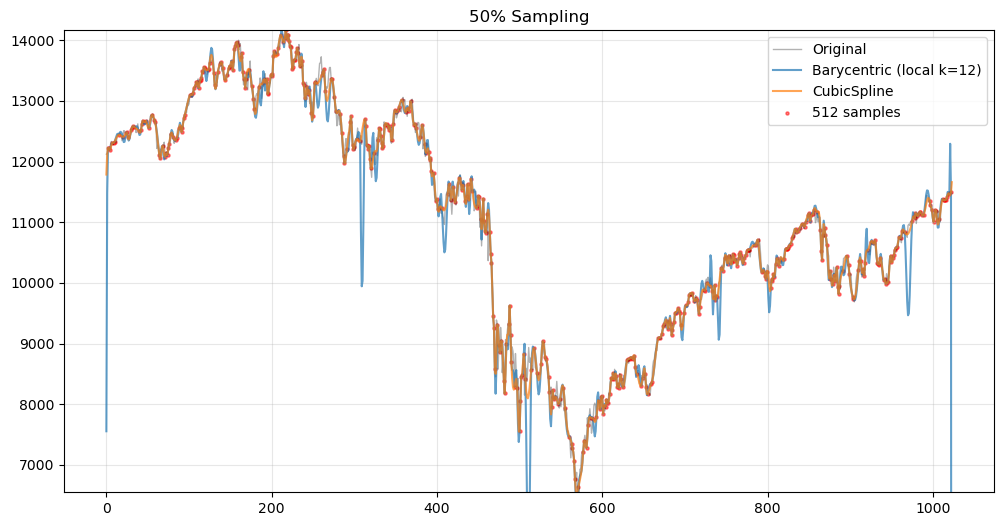

<Figure size 640x480 with 0 Axes>

In [10]:
num_points = int(0.5 * len(dow_data))
idx = rng.choice(len(dow_data), size=num_points, replace=False)
idx = np.sort(idx)

bary_vals = local_barycentric_eval(x_original, idx, dow_data[idx], k=12)
cubic = interpolate.CubicSpline(idx, dow_data[idx])

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_original, y_original, 'k-', label='Original', alpha=0.3, linewidth=1)
ax.plot(x_original, bary_vals, label='Barycentric (local k=12)', alpha=0.7)
ax.plot(x_original, cubic(x_original), label='CubicSpline', alpha=0.7)
ax.scatter(idx, dow_data[idx], c='red', s=5, alpha=0.5, label=f'{num_points} samples')
ax.set_ylim(np.min(dow_data), np.max(dow_data))
ax.set_title('50% Sampling')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()
plt.savefig("Interpolation Methods 50% Sample Size.png")